In [99]:
import pandas as pd

In [118]:
df = pd.read_csv('market_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


HARUS TAU SETIAP KOLOM ISINYA APA
Item_Identifier = Kode item
Item weight
Item fat content
Item visibility = stock; misal 0,065 berarti item was visible atau sold in 6,5% of all transactions atau shelf space
Item type 
Item MRP = Maksimum retail price
Outlet Identifier = Kode Outlet
Outlet Establishment Year
Outlet location type 
Oulet type
item outlet sales

Setelah itu diidentifikasi juga kolom apa aja yang diperluin, misal nan banyak di item weight tapi ternyata kita tidak perlu, yauda langsung di drop, gaperlu diisi lagi nan nya

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [102]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [120]:
df.isna().any().head()

Item_Identifier     False
Item_Weight          True
Item_Fat_Content    False
Item_Visibility     False
Item_Type           False
dtype: bool

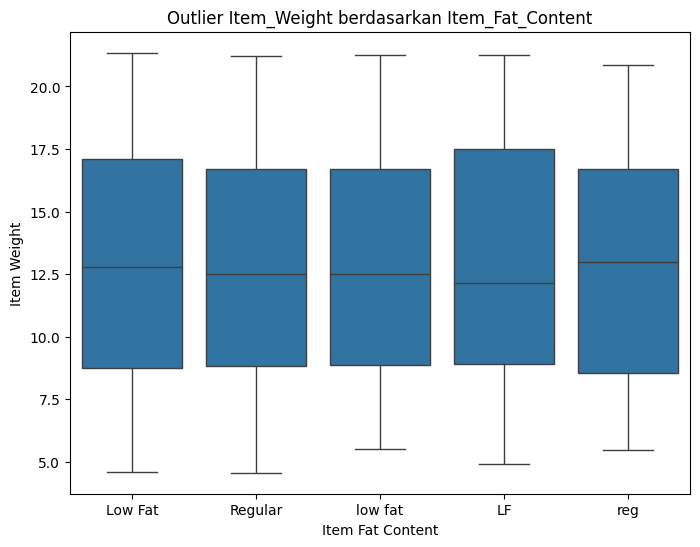

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')
plt.title('Outlier Item_Weight berdasarkan Item_Fat_Content')
plt.ylabel('Item Weight')
plt.xlabel('Item Fat Content')
plt.show()

In [104]:
# Tampilkan unique value dari kolom Item_Fat_Content
unique_content = df['Item_Fat_Content'].unique()
print(unique_content)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [105]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [106]:
unique_content = df['Item_Fat_Content'].unique()
print(unique_content)

['Low Fat' 'Regular']


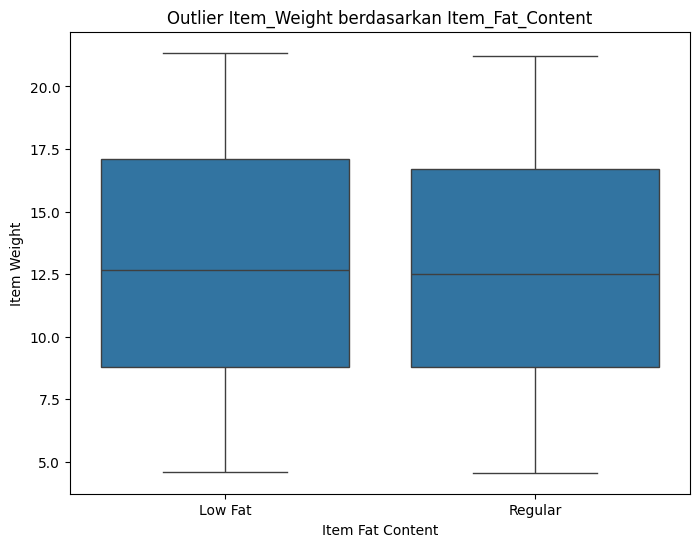

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')
plt.title('Outlier Item_Weight berdasarkan Item_Fat_Content')
plt.ylabel('Item Weight')
plt.xlabel('Item Fat Content')
plt.show()

##### Cleaning Missing Value

In [32]:
# Tampilkan semua baris yang memiliki missing value
rows_with_missing = df[df.isnull().any(axis=1)]
rows_with_missing


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7984,DRE12,4.590,Low Fat,0.000000,Soft Drinks,111.1860,OUT045,2002,NaN,Tier 2,Supermarket Type1,1245.0460
1412,DRF23,4.610,Low Fat,0.123346,Hard Drinks,172.5396,OUT017,2007,NaN,Tier 2,Supermarket Type1,3663.2316
3051,DRF23,4.610,Low Fat,0.122901,Hard Drinks,174.4396,OUT045,2002,NaN,Tier 2,Supermarket Type1,2616.5940
966,DRF23,4.610,Low Fat,0.205295,Hard Drinks,172.8396,OUT010,1998,NaN,Tier 3,Grocery Store,174.4396
4021,FDX49,4.615,Regular,0.102038,Canned,231.9300,OUT045,2002,NaN,Tier 2,Supermarket Type1,2563.3300
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [44]:
df.sort_values(by='Item_Identifier', inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1693,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
...,...,...,...,...,...,...,...,...,...,...,...,...
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


##### Mengisi missing value Item_Weight dari Item_Identifier yang sama

karna ternyata item identifier yang sama memiliki item weight yang sama

In [77]:
# Hitung rata-rata berat per Item_Identifier
item_weight_mean = df.groupby('Item_Identifier')['Item_Weight'].transform('mean')

# Isi missing value pada Item_Weight dengan nilai dari grup yang sama
df['Item_Weight'] = df['Item_Weight'].fillna(item_weight_mean)

print("Sisa missing value di Item_Weight:", df['Item_Weight'].isnull().sum())

df.sort_values(by='Item_Identifier', inplace=True)
df

Sisa missing value di Item_Weight: 4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,14.65,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,14.65,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552


In [78]:
print("Sisa missing value di Item_Weight:", df['Item_Weight'].isnull().sum())
row_missing_ItemWeight = df[df['Item_Weight'].isnull()]
print(row_missing_ItemWeight)

Sisa missing value di Item_Weight: 4
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4187           FDE52          NaN          Regular         0.029742   
1922           FDK57          NaN          Low Fat         0.079904   
927            FDN52          NaN          Regular         0.130933   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
4187         Dairy   88.9514            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
927   Frozen Foods   86.9198            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
4187      Medium               Tier 3  Supermarket Type3          3453.5046  
1922      Medium               Tier 3  Supermarket Type3         

In [79]:
# Terdapat 4 Item_Identifier yang unique sehingga Item_Weight masih kosong, tetapi jumlah tersebut tidak signifikan dibanding populasi sehingga dapat didrop
df = df.dropna(subset=['Item_Weight'])
print("Sisa missing value di Item_Weight:", df['Item_Weight'].isnull().sum())

Sisa missing value di Item_Weight: 0


##### Mengisi missing value dari Outlet_Size

In [94]:
df.sort_values(by='Outlet_Establishment_Year', inplace=True)
df

C:\Users\71477\AppData\Local\Temp\ipykernel_34820\630647272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Outlet_Establishment_Year', inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8090,DRL59,16.750,Low Fat,0.037161,Hard Drinks,54.2298,OUT019,1985,Small,Tier 1,Grocery Store,161.7894
2961,DRK13,11.800,Low Fat,0.114610,Soft Drinks,197.0084,OUT027,1985,Medium,Tier 3,Supermarket Type3,3372.9428
320,DRQ35,9.300,Low Fat,0.042087,Hard Drinks,122.4388,OUT027,1985,Medium,Tier 3,Supermarket Type3,5448.9072
180,FDQ28,14.000,Regular,0.060134,Frozen Foods,153.0656,OUT027,1985,Medium,Tier 3,Supermarket Type3,6024.1584
3006,FDU57,8.270,Regular,0.089121,Snack Foods,149.8708,OUT027,1985,Medium,Tier 3,Supermarket Type3,3611.2992
...,...,...,...,...,...,...,...,...,...,...,...,...
8323,FDH58,12.300,Low Fat,0.000000,Snack Foods,116.4834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1842.9344
7500,DRJ01,6.135,low fat,0.115501,Soft Drinks,161.1236,OUT018,2009,Medium,Tier 3,Supermarket Type2,644.4944
1780,DRL11,10.500,LF,0.048214,Hard Drinks,159.6946,OUT018,2009,Medium,Tier 3,Supermarket Type2,3629.2758
2183,DRE15,13.350,Low Fat,0.017858,Dairy,77.5012,OUT018,2009,Medium,Tier 3,Supermarket Type2,1518.0240


In [81]:
print(df.groupby(['Outlet_Type', 'Outlet_Size']).size())

Outlet_Type        Outlet_Size
Grocery Store      Small           527
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          932
dtype: int64


In [82]:
print(pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], normalize='index') * 100)

Outlet_Size             High      Medium       Small
Outlet_Type                                         
Grocery Store       0.000000    0.000000  100.000000
Supermarket Type1  25.040301   24.986566   49.973133
Supermarket Type2   0.000000  100.000000    0.000000
Supermarket Type3   0.000000  100.000000    0.000000


semua yang grocery ternyata small, jadi data null outlet size yang outlet typenya grocery, diisi dengan small
Outlet type supermarket type 2 dan 3 juga akan diisi dengan medium semua

In [ ]:
df.loc[(df['Outlet_Size'].isnull()) & (df['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
df.loc[(df['Outlet_Size'].isnull()) & (df['Outlet_Type'] == 'Supermarket Type2'), 'Outlet_Size'] = 'Medium'
df.loc[(df['Outlet_Size'].isnull()) & (df['Outlet_Type'] == 'Supermarket Type3'), 'Outlet_Size'] = 'Medium'

print("Sisa missing value di Oulet_Size:", df['Outlet_Size'].isnull().sum())
row_missing_OutletSize = df[df['Outlet_Size'].isnull()]
row_missing_OutletSize

Sisa missing value di Oulet_Size: 1855


C:\Users\71477\AppData\Local\Temp\ipykernel_34820\962004451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_missing_OutletSize.sort_values(by='Outlet_Identifier', inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1061,DRH23,14.65,Low Fat,0.171282,Hard Drinks,54.0614,OUT017,2007,NaN,Tier 2,Supermarket Type1,1160.4894
8496,FDJ57,7.42,Regular,0.021696,Seafood,185.3582,OUT017,2007,NaN,Tier 2,Supermarket Type1,3715.1640
6624,NCL54,12.60,Low Fat,0.083222,Household,174.5054,OUT017,2007,NaN,Tier 2,Supermarket Type1,2626.5810
4581,FDY36,12.30,Low Fat,0.009464,Baking Goods,73.8380,OUT017,2007,NaN,Tier 2,Supermarket Type1,1245.0460
4756,FDV60,20.20,Regular,0.118025,Baking Goods,195.8110,OUT017,2007,NaN,Tier 2,Supermarket Type1,2553.3430
...,...,...,...,...,...,...,...,...,...,...,...,...
3451,DRG51,12.10,Low Fat,0.011563,Dairy,164.9526,OUT045,2002,NaN,Tier 2,Supermarket Type1,2302.3364
5362,FDZ48,17.75,Low Fat,0.076114,Baking Goods,111.4544,OUT045,2002,NaN,Tier 2,Supermarket Type1,1006.6896
691,NCH55,16.35,Low Fat,0.034743,Household,127.4020,OUT045,2002,NaN,Tier 2,Supermarket Type1,759.0120
3311,NCI18,18.35,Low Fat,0.014052,Household,224.0746,OUT045,2002,NaN,Tier 2,Supermarket Type1,1346.2476


In [90]:
unique_outletIden = row_missing_OutletSize['Outlet_Identifier'].unique()
print(unique_outletIden)

['OUT017' 'OUT045']


In [95]:
jumlah_data_out017 = df[df['Outlet_Identifier'] == 'OUT017'].shape[0]
print("Jumlah data untuk OUT017:", jumlah_data_out017)
jumlah_data_out045 = df[df['Outlet_Identifier'] == 'OUT045'].shape[0]
print("Jumlah data untuk OUT045:", jumlah_data_out045)


Jumlah data untuk OUT017: 926
Jumlah data untuk OUT045: 929


In [89]:
print(pd.crosstab(df['Outlet_Identifier'], df['Outlet_Size'], normalize='index') * 100)

Outlet_Size         High  Medium  Small
Outlet_Identifier                      
OUT010               0.0     0.0  100.0
OUT013             100.0     0.0    0.0
OUT018               0.0   100.0    0.0
OUT019               0.0     0.0  100.0
OUT027               0.0   100.0    0.0
OUT035               0.0     0.0  100.0
OUT046               0.0     0.0  100.0
OUT049               0.0   100.0    0.0


In [ ]:
# Di samakan proporsi data supermarket type 1
df.loc[(df['Outlet_Identifier'] == 'OUT017') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'High'
df.loc[(df['Outlet_Identifier'] == 'OUT045') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Medium'
print("Sisa missing value di Oulet_Size:", df['Outlet_Size'].isnull().sum())

Sisa missing value di Oulet_Size: 0


In [98]:
print(pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], normalize='index') * 100)

Outlet_Size             High      Medium       Small
Outlet_Type                                         
Grocery Store       0.000000    0.000000  100.000000
Supermarket Type1  33.315403   33.333333   33.351264
Supermarket Type2   0.000000  100.000000    0.000000
Supermarket Type3   0.000000  100.000000    0.000000


In [108]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Cleaning Data Duplicate

In [22]:
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplicate

##### Apabila dilakukan analisis lanjutan

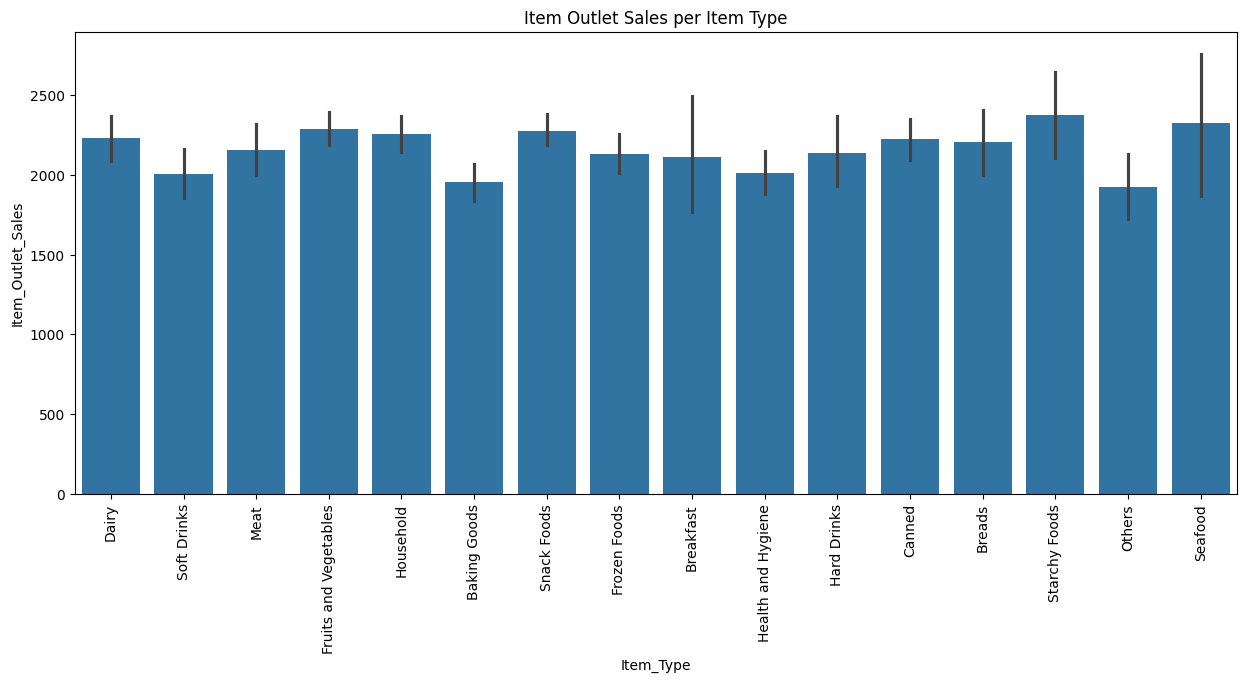

In [113]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Item Outlet Sales per Item Type')
plt.show()


🔝 10 Produk dengan penjualan tertinggi:
Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
FDK03    34843.9772
NCQ06    34680.1904
NCQ53    34508.4140
FDJ55    33531.0196
FDD44    32723.4042
Name: Item_Outlet_Sales, dtype: float64


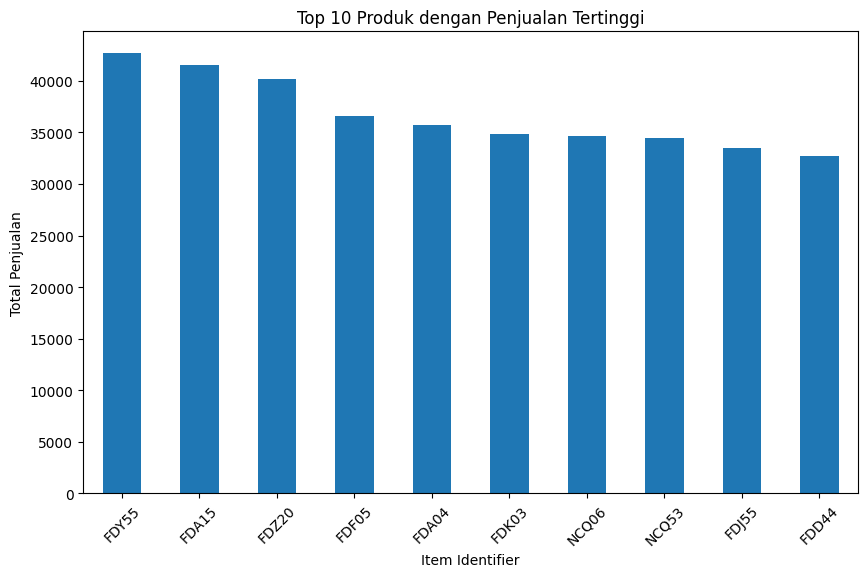

In [123]:
# Ranking Produk Terlaris
top_products = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).head(10)
print("🔝 10 Produk dengan penjualan tertinggi:")
print(top_products)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title('Top 10 Produk dengan Penjualan Tertinggi')
plt.xlabel('Item Identifier')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Ranking Outlet Terlaris



kalo di analisis stat, bisa juga diliat item type apa yang kurang di outlet apa (untuk dapetin barang apa yang laku dan dimana)
bisa juga tunjukin item visibility, misal kek untuk tau ternyaat stok a rendah pdhl penjualannya tinggi, harusnya stoknya ditingkatkan
bisa juga dibandingin dengan mrp 